# OLID-BR - Paper charts

In [1]:
import sys
from pathlib import Path

if str(Path(".").absolute().parent) not in sys.path:
    sys.path.append(str(Path(".").absolute().parent.parent))

In [2]:
from dotenv import load_dotenv

# Initialize the env vars
load_dotenv("../../.env")

True

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from src.settings import AppSettings
from src.kaggle import download_dataset

sns.set_theme(
    style="white",
    rc={
        "axes.spines.right": False,
        "axes.spines.top": False
    }
)

args = AppSettings()

## Downloading the dataset

In [7]:
df = download_dataset("train.csv")["train.csv"]

# Convert toxic_spans to if it contains toxic spans or not
df["has_toxic_spans"] = df["toxic_spans"].apply(lambda x: 1 if x != "[]" and pd.notnull(x) else 0)

print(f"Shape: {df.shape}")
df.head()

Shape: (4765, 18)


,id,text,is_offensive,is_targeted,targeted_type,toxic_spans,health,ideology,insult,lgbtqphobia,other_lifestyle,physical_aspects,profanity_obscene,racism,religious_intolerance,sexism,xenophobia,has_toxic_spans
0,430b13705cf34e13b74bc999425187c3,USER USER é muito bom. USER ^^ E claro a equip...,NOT,UNT,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,0
1,c779826dc43f460cb18e8429ca443477,Pior do que adolescentezinhas de merda...são p...,OFF,UNT,NaN,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",False,False,True,False,False,False,True,False,False,True,False,1
2,e64148caa4474fc79298e01d0dda8f5e,USER Toma no cu é vitamina como tu e tua prima.,OFF,TIN,GRP,"[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17...",False,False,True,False,False,False,True,False,False,False,False,1
3,cc66b54eeec24607a67e2259134a1cdd,"Muito bom, pena a circunstâncias serem ruins, ...",OFF,UNT,NaN,"[119, 120, 121, 122, 123, 124, 125, 126, 127, ...",False,False,True,False,False,False,False,False,False,False,False,1
4,a3d7839456ae4258a70298fcf637952e,"Podia ter beijo também, pra ver se o homofóbic...",OFF,UNT,NaN,"[24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 3...",False,False,True,False,False,False,False,False,False,False,False,1


In [8]:
df.sum()

C:\Users\trajano\AppData\Local\Temp\ipykernel_29820\1703867807.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.sum()


id                       430b13705cf34e13b74bc999425187c3c779826dc43f46...
text                     USER USER é muito bom. USER ^^ E claro a equip...
is_offensive             NOTOFFOFFOFFOFFOFFOFFOFFOFFOFFOFFOFFOFFOFFOFFO...
is_targeted              UNTUNTTINUNTUNTTINTINTINUNTUNTTINUNTUNTTINTINT...
health                                                                 118
ideology                                                               910
insult                                                                4050
lgbtqphobia                                                            277
other_lifestyle                                                        100
physical_aspects                                                       247
profanity_obscene                                                     1686
racism                                                                  69
religious_intolerance                                                    0
sexism                   

## `is_offensive` distribution

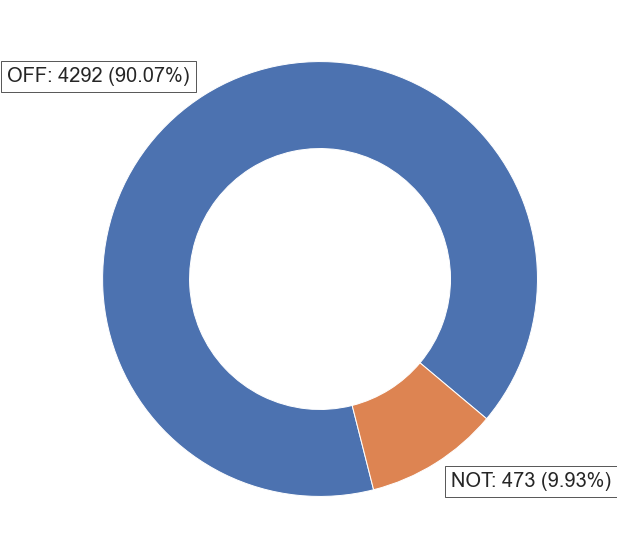

In [7]:
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect="equal"))

data = df["is_offensive"].value_counts().reset_index()
data.columns = ["is_offensive", "count"]

wedges, texts = ax.pie(
    data["count"],
    wedgeprops=dict(width=0.4),
    startangle=-40,
    textprops=dict(color="w"),
)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"), bbox=bbox_props, zorder=0, va="center")

# Add labels
for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1) / 2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(
        text=f"{data['is_offensive'][i]}: {data['count'][i]} ({data['count'][i] / data['count'].sum() * 100:.2f}%)",
        xy=(x, y),
        xytext=(0.6 * np.sign(x), 1.1 * y),
        horizontalalignment=horizontalalignment,
        fontsize=20,
        **kw
    )

## `is_targeted` distribution

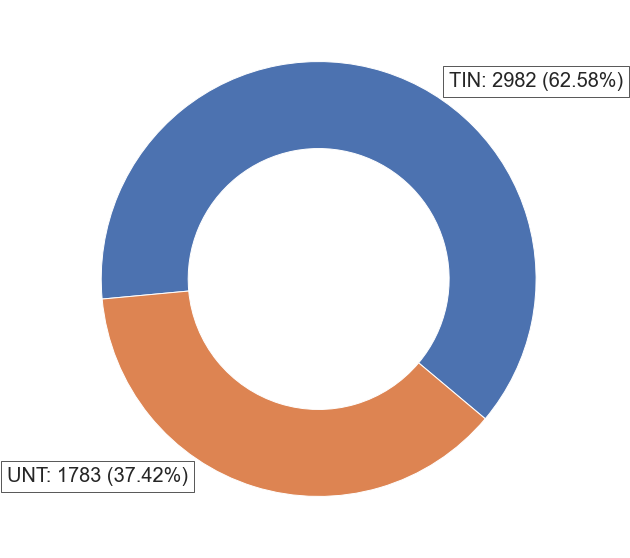

In [8]:
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect="equal"))

data = df["is_targeted"].value_counts().reset_index()
data.columns = ["is_targeted", "count"]

wedges, texts = ax.pie(
    data["count"],
    wedgeprops=dict(width=0.4),
    startangle=-40,
    textprops=dict(color="w"),
)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"), bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1) / 2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(
        text=f"{data['is_targeted'][i]}: {data['count'][i]} ({data['count'][i] / data['count'].sum() * 100:.2f}%)",
        xy=(x, y),
        xytext=(0.6 * np.sign(x), 0.95 * y),
        horizontalalignment=horizontalalignment,
        fontsize=20,
        **kw
    )

## `targeted_type` distribution

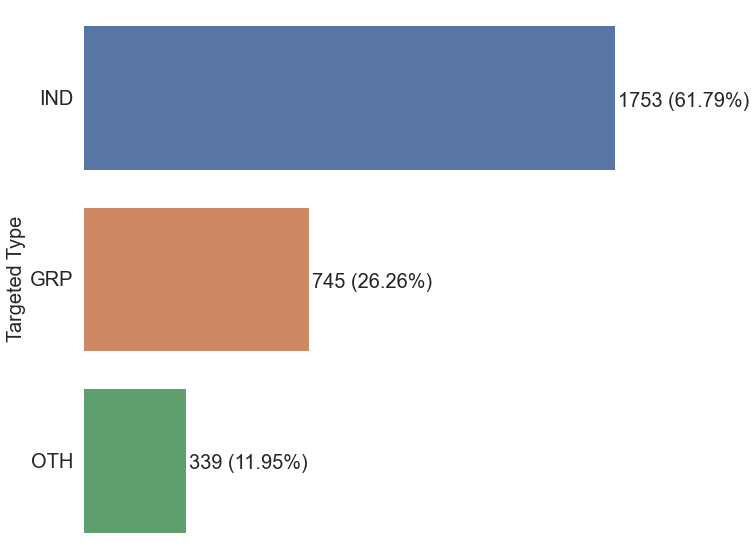

In [9]:
# plt bar plot for targeted_type distribution
fig, ax = plt.subplots(figsize=(10, 10))

data = df["targeted_type"].value_counts().reset_index()
data.columns = ["targeted_type", "count"]

sns.barplot(
    x="count",
    y="targeted_type",
    data=data,
    ax=ax
)

ax.tick_params(axis="both", which="major", labelsize=20)

ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_xticks([])
ax.set_xlabel("")
ax.set_ylabel("Targeted Type", fontsize=20)

for p in ax.patches:
    width = p.get_width()
    ax.text(
        width + 10,
        p.get_y() + p.get_height() / 2. + 0.05,
        f"{int(width)} ({width / data['count'].sum() * 100:.2f}%)",
        ha="left",
        fontsize=20
    )

## `toxic_spans` distribution

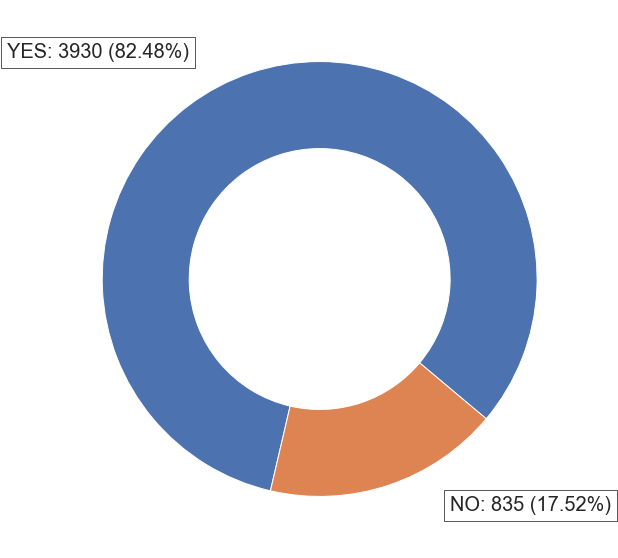

In [18]:
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect="equal"))

data = df["has_toxic_spans"].replace({1: "YES", 0: "NO"}).value_counts().reset_index()
data.columns = ["has_toxic_spans", "count"]

wedges, texts = ax.pie(
    data["count"],
    wedgeprops=dict(width=0.4),
    startangle=-40,
    textprops=dict(color="w"),
)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"), bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1) / 2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(
        text=f"{data['has_toxic_spans'][i]}: {data['count'][i]} ({data['count'][i] / data['count'].sum() * 100:.2f}%)",
        xy=(x, y),
        xytext=(0.6 * np.sign(x), 1.1 * y),
        horizontalalignment=horizontalalignment,
        fontsize=20,
        **kw
    )

## Toxicity labels distribution

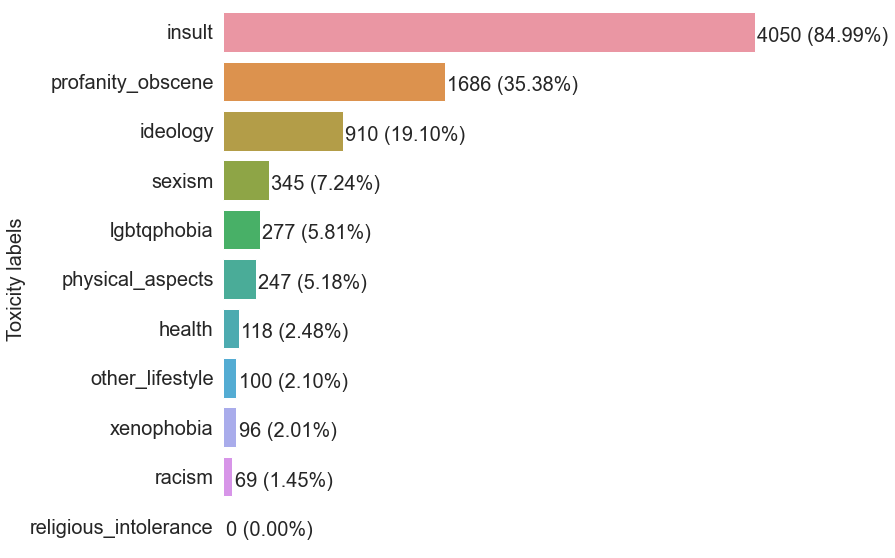

In [9]:
# toxicity labels distribution

toxicity_labels = [
    "health",
    "ideology",
    "insult",
    "lgbtqphobia",
    "other_lifestyle",
    "physical_aspects",
    "profanity_obscene",
    "racism",
    "religious_intolerance",
    "sexism",
    "xenophobia"
]

fig, ax = plt.subplots(figsize=(10, 10))

data = df[toxicity_labels].sum().reset_index()
data.columns = ["toxicity_label", "count"]

data.sort_values(by="count", ascending=False, inplace=True)

sns.barplot(
    x="count",
    y="toxicity_label",
    data=data,
    ax=ax
)

ax.tick_params(axis="both", which="major", labelsize=20)

ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_xticks([])
ax.set_xlabel("")
ax.set_ylabel("Toxicity labels", fontsize=20)

for p in ax.patches:
    width = p.get_width()
    ax.text(
        width + 20,
        p.get_y() + p.get_height() / 2. + 0.2,
        f"{int(width)} ({width / len(df) * 100:.2f}%)",
        ha="left",
        fontsize=20
    )

## IRR over iterations

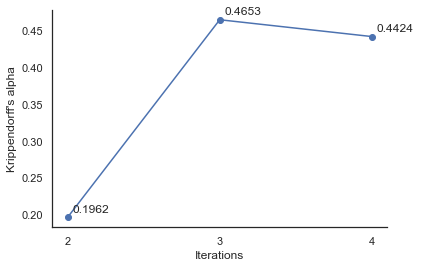

In [10]:
x = [2, 3, 4]
y = [0.1962, 0.4653, 0.4424]

fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(x, y, marker="o")
ax.set_xticks(x)

ax.set_xlabel("Iterations")
ax.set_ylabel("Krippendorff's alpha")

# Add text annotations
for i, j in zip(x, y):
    ax.annotate(f"{j:.4f}", xy=(i, j), xytext=(5, 5), textcoords="offset points")

plt.show()

## Origin

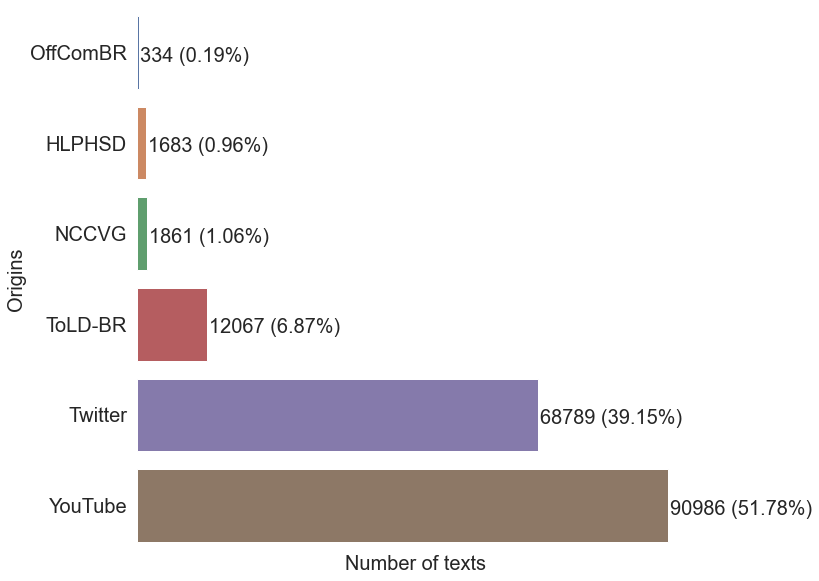

In [18]:
data = {
    "OffComBR": 334,
    "HLPHSD": 1683,
    "NCCVG": 1861,
    "ToLD-BR": 12067,
    "Twitter": 68789,
    "YouTube": 90986
}

fig, ax = plt.subplots(figsize=(10, 10))

sns.barplot(
    x=list(data.values()),
    y=list(data.keys()),
    orient="h",
    ax=ax
)

ax.tick_params(axis="both", which="major", labelsize=20)

ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_xticks([])
ax.set_xlabel("Number of texts", fontsize=20)
ax.set_ylabel("Origins", fontsize=20)

for p in ax.patches:
    width = p.get_width()
    ax.text(
        width + 300,
        p.get_y() + p.get_height() / 2. + 0.1,
        f"{int(width)} ({width / sum(data.values()) * 100:.2f}%)",
        ha="left",
        fontsize=20
    )
